### From medium:

> **POST:** https://medium.com/coinmonks/multi-label-classification-blog-tags-prediction-using-nlp-b0b5ee6686fc

> **CODE:** https://github.com/neelindresh/NeelBlog/blob/master/%5BProject%20Complete%20Tag%20Prediction%20%5DtagLabelprediction.ipynb

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import urllib3
from pandas import DataFrame
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
http = urllib3.PoolManager()
column = ["Title", "Body"]
dfBA = DataFrame(columns=column)
dfT = DataFrame(columns=[0, 1, 2, 3, 4])

In [3]:
def spider(link):
    blogData = http.request('GET', link)
    soup = BeautifulSoup(blogData.data, 'html.parser')
    for links in soup.find_all('div', {'class': 'postArticle-readMore'}):
        link = links.find('a').get('href')
        CrawlAndFrame(link)

In [10]:
def CrawlAndFrame(link):
    blogData = http.request('GET', link)
    soup = BeautifulSoup(blogData.data, 'html.parser')
    article = ''
    tags = []
    heading = soup.find('h1').text
    for para in soup.find_all('p'):
        p = para.text
        article = article + ' ' + p
    for mtags in soup.find_all('a', {'class': 'link u-baseColor--link'}):
        tags.append(mtags.text)
    someList = [heading, article, tuple(tags)]
    CreateDataFrame(someList)

In [11]:
def CreateDataFrame(someList):
    t = {}
    d = {'Title': [someList[0]], 'Body': [someList[1]]}
    for n in range(5):
        if len(someList[2]) > n:
            t[n] = [someList[2][n]]
        else:
            t[n] = ['0']
    toDf = DataFrame(data=d)
    global dfBA, dfT
    dfBA = dfBA.append(toDf)
    dfT = dfT.append(DataFrame(data=t))

In [12]:
dfBA.head()

,Title,Body


In [13]:
dfT.head()

,0,1,2,3,4


In [14]:
urls = [
    'https://medium.com/search?q=machine%20learning',
    'https://medium.com/search?q=deep%20learning'
]
for url in urls:
    spider(url)

/home/codemantra/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/codemantra/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/codemantra/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/codemantra/anaconda3/lib/python3.7/site-packages/urllib3/connectionpoo

/home/codemantra/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/codemantra/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/codemantra/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/codemantra/anaconda3/lib/python3.7/site-packages/urllib3/connectionpoo

AttributeError: 'NoneType' object has no attribute 'text'

In [15]:
dfBA.head()


,Title,Body
0,Machine Learning is Fun!,Update: This article is part of a series. Che...
0,"Cheat Sheets for AI, Neural Networks, Machine ...","Over the past few months, I have been collect..."
0,Every single Machine Learning course on the in...,"A year and a half ago, I dropped out of one o..."
0,Essential Cheat Sheets for Machine Learning an...,"Machine learning is complex. For newbies, sta..."
0,A Tour of The Top 10 Algorithms for Machine Le...,"In machine learning, there’s something called..."


In [16]:
dfT.head()

,0,1,2,3,4
0,Machine Learning,0,0,0,0
0,Machine Learning,Deep Learning,Artificial Intelligence,Neural Networks,Big Data
0,Machine Learning,Artificial Intelligence,Tech,Programming,Technology
0,Machine Learning,Artificial Intelligence,Deep Learning,Technology,Computer Science
0,Machine Learning,Algorithms,Data Science,Towards Data Science,0


In [17]:
df = pd.concat([dfBA, dfT], axis=1)

In [18]:
df.head(10)

,Title,Body,0,1,2,3,4
0,Machine Learning is Fun!,Update: This article is part of a series. Che...,Machine Learning,0,0,0,0
0,"Cheat Sheets for AI, Neural Networks, Machine ...","Over the past few months, I have been collect...",Machine Learning,Deep Learning,Artificial Intelligence,Neural Networks,Big Data
0,Every single Machine Learning course on the in...,"A year and a half ago, I dropped out of one o...",Machine Learning,Artificial Intelligence,Tech,Programming,Technology
0,Essential Cheat Sheets for Machine Learning an...,"Machine learning is complex. For newbies, sta...",Machine Learning,Artificial Intelligence,Deep Learning,Technology,Computer Science
0,A Tour of The Top 10 Algorithms for Machine Le...,"In machine learning, there’s something called...",Machine Learning,Algorithms,Data Science,Towards Data Science,0
0,30 Amazing Machine Learning Projects for the P...,"For the past year, we’ve compared nearly 8,80...",Machine Learning,Data Science,Artificial Intelligence,Programming,Tech
0,Machine Learning is Fun! Part 4: Modern Face R...,Update: This article is part of a series. Che...,Machine Learning,Artificial Intelligence,Deep Learning,0,0
0,Machine Learning is Fun! Part 3: Deep Learning...,Update: This article is part of a series. Che...,Machine Learning,Artificial Intelligence,Deep Learning,0,0
0,The Non-Technical Guide to Machine Learning & ...,"I have a challenge for you. In a few seconds,...",Artificial Intelligence,Machine Learning,Startups,Tech,Technology
0,Machine Learning is Fun! Part 2,Update: This article is part of a series. Che...,Artificial Intelligence,Machine Learning,Nintendo,0,0


In [19]:
stopWordList=stopwords.words('english')
stopWordList.remove('no')
stopWordList.remove('not')

In [20]:
def removeTags(data):
    soup=BeautifulSoup(data,'html.parser')
    text=soup.get_text()
    return text

In [21]:
import unicodedata
import spacy

In [22]:
def removeAscendingChar(data):
    data = unicodedata.normalize('NFKD', data).encode('ascii',
                                                      'ignore').decode(
                                                          'utf-8', 'ignore')
    return data

In [23]:
def removeCharDigit(text):
    str = '`1234567890-=~@#$%^&*()_+[!{;":\'><.,/?"}]'
    for w in text:
        if w in str:
            text = text.replace(w, '')
    return text

In [24]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import ToktokTokenizer

In [25]:
lemma = WordNetLemmatizer()
token = ToktokTokenizer()


def lemitizeWords(text):
    words = token.tokenize(text)
    listLemma = []
    for w in words:
        x = lemma.lemmatize(w, 'v')
        listLemma.append(x)
    return text

In [26]:
def stopWordsRemove(text):

    wordList = [x.lower().strip() for x in token.tokenize(text)]

    removedList = [x for x in wordList if not x in stopWordList]
    text = ' '.join(removedList)
    return text

In [27]:
def PreProcessing(text):
    text = removeTags(text)
    text = removeCharDigit(text)
    text = removeAscendingChar(text)
    text = lemitizeWords(text)
    text = stopWordsRemove(text)
    return text

In [28]:
totalText = ''
for x in df['Body']:
    ps = PreProcessing(x)
    totalText = totalText + " " + ps

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

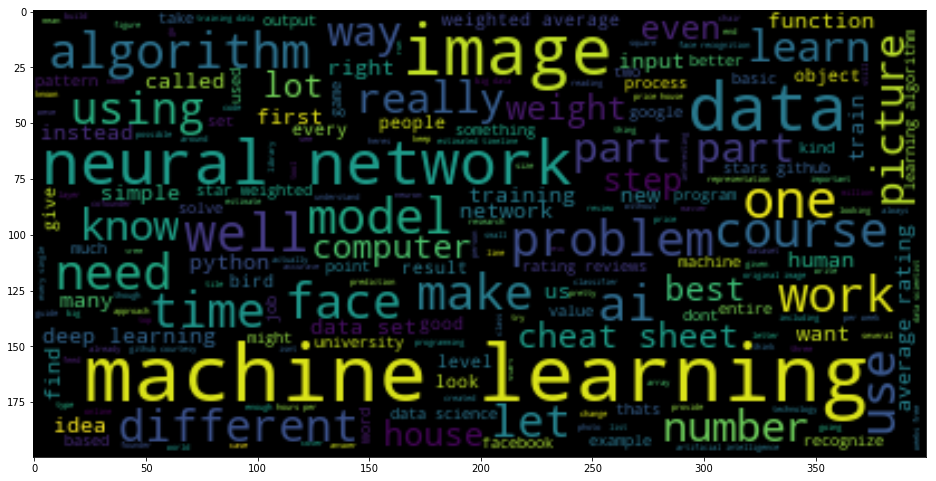

In [30]:
wc = WordCloud().generate(totalText)
plt.figure(figsize=(16, 12))
plt.imshow(wc, interpolation="bilinear")

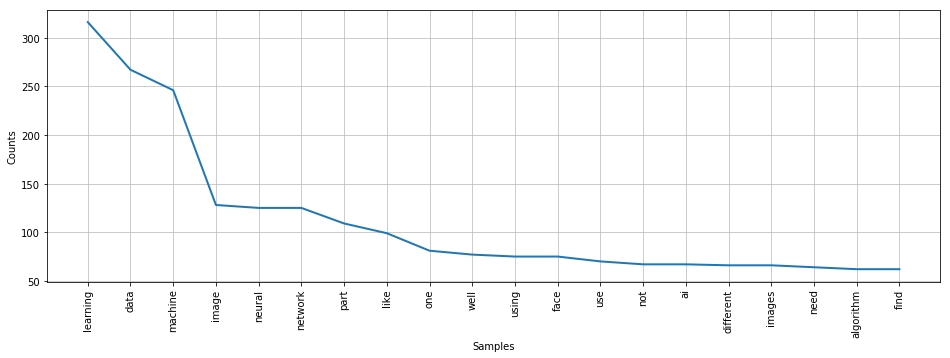

In [20]:
import nltk
freqdist = nltk.FreqDist(token.tokenize(totalText))
freqdist
plt.figure(figsize=(16,5))
freqdist.plot(20)

In [32]:
x = df.iloc[:, 0:2].values
y = df.iloc[:, 2:-1]

In [35]:
okList = []
for cl in dfT.columns:
    for n in df[cl]:
        okList.append(n)
okList = list(set(okList))
del (okList[okList.index('0')])

In [37]:
newDF = DataFrame(columns=okList)

In [44]:
for x in range(dfT.count()[0]):
    someDict = {}
    for d in okList:
        rowdata = list(dfT.iloc[x])
        if d in rowdata:
            someDict[d] = 1
        else:
            someDict[d] = 0
    newDF = newDF.append(someDict, ignore_index=True)

In [42]:
dfT.head()


,0,1,2,3,4
0,Machine Learning,0,0,0,0
0,Machine Learning,Deep Learning,Artificial Intelligence,Neural Networks,Big Data
0,Machine Learning,Artificial Intelligence,Tech,Programming,Technology
0,Machine Learning,Artificial Intelligence,Deep Learning,Technology,Computer Science
0,Machine Learning,Algorithms,Data Science,Towards Data Science,0


In [45]:
dfBA.index = range(dfBA.count()[0])
df = dfBA.join(newDF)

In [46]:
df.head()

,Title,Body,Artificial Intelligence,Startups,Computer Science,Nintendo,Algorithms,Jonathan Sugumar,Startup,Basic Income,...,Data Science,Big Data,Programming,Technology,Neural Networks,Some rights reserved,Machine Learning,Business,Tech,Deep Learning
0,Machine Learning is Fun!,Update: This article is part of a series. Che...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,"Cheat Sheets for AI, Neural Networks, Machine ...","Over the past few months, I have been collect...",1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
2,Every single Machine Learning course on the in...,"A year and a half ago, I dropped out of one o...",1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
3,Essential Cheat Sheets for Machine Learning an...,"Machine learning is complex. For newbies, sta...",1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4,A Tour of The Top 10 Algorithms for Machine Le...,"In machine learning, there’s something called...",0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [47]:
x = df.iloc[:, 0:2].values
y = df.iloc[:, 2:-1].values
x1 = df.Title
x2 = df.Body
cv = CountVectorizer().fit(x1)
header = DataFrame(cv.transform(x1).todense(), columns=cv.get_feature_names())
cvArticle = CountVectorizer().fit(x2)
article = DataFrame(
    cvArticle.transform(x2).todense(), columns=cvArticle.get_feature_names())
x = pd.concat([header, article], axis=1)

In [48]:
tfidfhead=TfidfTransformer().fit(header)
head=DataFrame(tfidfhead.transform(header).todense())
tfidfart=TfidfTransformer().fit(article)
art=DataFrame(tfidfart.transform(article).todense())
x=pd.concat([head,art],axis=1)